In [31]:
# Import necessary libraries 

import sys                        # System-specific functions
import os                         # Operating system interaction
import pandas as pd               # Data manipulation
import seaborn as sns             # data visualization
import plotly.express as px       # Interactive visualizations
import plotly.graph_objects as go 
import matplotlib.pyplot as plt   # Static and animated plots
from datetime import datetime     # Date and time manipulation
import isodate                    # ISO 8601 date handling







In [ ]:
# Add the path to the functions directory, run this if you are using the notebook outisde the functions folder
# sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'functions')))

In [ ]:
from config import youtube        # YouTube API configuration

In [3]:
#importing the necessary functions used 

from get_channel_stats import search_channel_id           # getting channel_id from channel name
from get_channel_stats import get_channel_info            # getting channel info from channel_id
from get_video_stats import get_video_id                  # using playlist_id obtained from get_channel_info to get video_id of each video
from get_video_stats import  get_video_details            # using video_id to get info for each video
from multiple_channels import search_channel_ids          # channel_id for multiple channels
from multiple_channels import get_multiple_channel_stats  # channel_stats for multiple channels

In [22]:
# input the channel name here:
channel_name = "3Blue1Brown"
channel_id=search_channel_id(youtube,channel_name)
channel_info=get_channel_info(youtube,channel_id)

In [23]:
channel_info

{'channel_name': '3Blue1Brown',
 'views': '565064064',
 'subscribers': '6580000',
 'total_videos': '185',
 'playlist_id': 'UUYO_jab_esuFRV4b17AJtAw'}

In [24]:
# testing with the same example as above
# this step is slow and a way to speed it will be required
playlist_id=get_channel_info(youtube,channel_id)['playlist_id']
video_ids=get_video_id(youtube,playlist_id)
video_details=get_video_details(youtube,video_ids)

In [25]:
# converting video_details to pandas dataframe
video_data=pd.DataFrame(video_details)
video_data

,Title,published_date,views,likes,dislikes,comments,thumbnail_url,duration
0,How I animate 3Blue1Brown | A Manim demo with ...,2024-10-12T13:00:39Z,696693,39409,0,1405,https://i.ytimg.com/vi/rbu7Zu5X1zI/hqdefault.jpg,PT53M41S
1,Hologram preview,2024-10-11T14:00:27Z,23431,1627,0,33,https://i.ytimg.com/vi/W3-kpRz-e1Q/hqdefault.jpg,PT58S
2,Holograms are wild (full video linked above),2024-10-05T15:35:00Z,1810074,105409,0,717,https://i.ytimg.com/vi/DnjATyPuFFk/hqdefault.jpg,PT55S
3,How are holograms possible? | Optics puzzles 5,2024-10-05T15:31:58Z,1077273,54389,0,2483,https://i.ytimg.com/vi/EmKQsSDlaa4/hqdefault.jpg,PT46M24S
4,A cute probability fact (part 3),2024-09-10T15:42:38Z,204021,11830,0,113,https://i.ytimg.com/vi/lpzUZDefha0/hqdefault.jpg,PT1M
...,...,...,...,...,...,...,...,...
180,How to count to 1000 on two hands,2015-09-18T21:53:13Z,429200,12585,0,1166,https://i.ytimg.com/vi/1SMmc9gQmHQ/hqdefault.jpg,PT2M34S
181,What does it feel like to invent math?,2015-08-14T01:20:50Z,4200590,93672,0,5956,https://i.ytimg.com/vi/XFDM1ip5HdU/hqdefault.jpg,PT15M8S
182,Euler's Formula and Graph Duality,2015-06-21T06:05:43Z,474460,11578,0,363,https://i.ytimg.com/vi/-9OUyo8NFZg/hqdefault.jpg,PT7M27S
183,Euler's Formula Poem,2015-03-05T06:15:23Z,167064,5148,0,149,https://i.ytimg.com/vi/zLzLxVeqdQg/hqdefault.jpg,PT1M4S


In [10]:
# checking datatypes of the dataframe
video_data.dtypes

Title             object
published_date    object
views              int64
likes              int64
dislikes           int64
comments           int64
thumbnail_url     object
duration          object
dtype: object

In [28]:
# changing the numerical values to int type and date to datetime format

video_data['views']=pd.to_numeric(video_data['views'])
video_data['likes']=pd.to_numeric(video_data['likes'])
video_data['comments']=pd.to_numeric(video_data['comments'])
video_data['published_date']=pd.to_datetime(video_data['published_date']).dt.date
video_data.dtypes

Title             object
published_date    object
views              int64
likes              int64
dislikes           int64
comments           int64
thumbnail_url     object
duration          object
dtype: object

In [12]:
# dataframe to store top10_videos on the channel by views
top10_videos_views = video_data.sort_values(by='views',ascending=False).head(10)
top10_videos_views

,Title,published_date,views,likes,dislikes,comments,thumbnail_url,duration
48,I'm still astounded this is true,2023-12-07,53601571,2420178,0,10564,https://i.ytimg.com/vi/P11ykXwx4-k/hqdefault.jpg,PT1M
103,But what is a Fourier series? From heat flow ...,2019-06-30,17908254,175986,0,4200,https://i.ytimg.com/vi/r6sGWTCMz2k/hqdefault.jpg,PT24M47S
133,"But what is a neural network? | Chapter 1, Dee...",2017-10-05,17561874,430196,0,7604,https://i.ytimg.com/vi/aircAruvnKk/hqdefault.jpg,PT18M40S
138,But how does bitcoin actually work?,2017-07-07,15997740,367557,0,25686,https://i.ytimg.com/vi/bBC-nXj3Ng4/hqdefault.jpg,PT25M16S
129,The hardest problem on the hardest test,2017-12-08,15729423,406025,0,20177,https://i.ytimg.com/vi/OkmNXy7er84/hqdefault.jpg,PT11M15S
49,Don't let it fool you! (Link above explains wh...,2023-12-07,14891191,736044,0,4510,https://i.ytimg.com/vi/VFbyGEZLMZw/hqdefault.jpg,PT1M
34,Order from chaos,2023-12-15,13725824,359530,0,2101,https://i.ytimg.com/vi/GOSezO0CHss/hqdefault.jpg,PT50S
110,The most unexpected answer to a counting puzzle,2019-01-13,13065803,309621,0,6728,https://i.ytimg.com/vi/HEfHFsfGXjs/hqdefault.jpg,PT5M13S
67,Solving Wordle using information theory,2022-02-06,10569834,225466,0,8928,https://i.ytimg.com/vi/v68zYyaEmEA/hqdefault.jpg,PT30M38S
126,But what is the Fourier Transform? A visual i...,2018-01-26,10486531,296316,0,8741,https://i.ytimg.com/vi/spUNpyF58BY/hqdefault.jpg,PT20M57S


In [13]:
# dataframe to store top10_videos on the channel by likes
top10_videos_likes = video_data.sort_values(by='likes',ascending=False).head(10)
top10_videos_likes

,Title,published_date,views,likes,dislikes,comments,thumbnail_url,duration
48,I'm still astounded this is true,2023-12-07,53601571,2420178,0,10564,https://i.ytimg.com/vi/P11ykXwx4-k/hqdefault.jpg,PT1M
49,Don't let it fool you! (Link above explains wh...,2023-12-07,14891191,736044,0,4510,https://i.ytimg.com/vi/VFbyGEZLMZw/hqdefault.jpg,PT1M
19,"The medical test paradox (well ""paradox"")",2024-01-15,9743832,445742,0,2813,https://i.ytimg.com/vi/xIMlJUwB1m8/hqdefault.jpg,PT57S
27,The Newton art puzzle,2023-12-29,8196567,434899,0,1708,https://i.ytimg.com/vi/kpG7I2MOcnI/hqdefault.jpg,PT1M
133,"But what is a neural network? | Chapter 1, Dee...",2017-10-05,17561874,430196,0,7604,https://i.ytimg.com/vi/aircAruvnKk/hqdefault.jpg,PT18M40S
129,The hardest problem on the hardest test,2017-12-08,15729423,406025,0,20177,https://i.ytimg.com/vi/OkmNXy7er84/hqdefault.jpg,PT11M15S
138,But how does bitcoin actually work?,2017-07-07,15997740,367557,0,25686,https://i.ytimg.com/vi/bBC-nXj3Ng4/hqdefault.jpg,PT25M16S
34,Order from chaos,2023-12-15,13725824,359530,0,2101,https://i.ytimg.com/vi/GOSezO0CHss/hqdefault.jpg,PT50S
110,The most unexpected answer to a counting puzzle,2019-01-13,13065803,309621,0,6728,https://i.ytimg.com/vi/HEfHFsfGXjs/hqdefault.jpg,PT5M13S
47,How prisms work (full video linked above),2023-12-07,6654760,302346,0,1659,https://i.ytimg.com/vi/GSIuXqgPsnY/hqdefault.jpg,PT1M


In [14]:
# dataframe to store top10_videos on the channel by comments
top10_videos_comments = video_data.sort_values(by='comments',ascending=False).head(10)
top10_videos_comments

,Title,published_date,views,likes,dislikes,comments,thumbnail_url,duration
138,But how does bitcoin actually work?,2017-07-07,15997740,367557,0,25686,https://i.ytimg.com/vi/bBC-nXj3Ng4/hqdefault.jpg,PT25M16S
129,The hardest problem on the hardest test,2017-12-08,15729423,406025,0,20177,https://i.ytimg.com/vi/OkmNXy7er84/hqdefault.jpg,PT11M15S
48,I'm still astounded this is true,2023-12-07,53601571,2420178,0,10564,https://i.ytimg.com/vi/P11ykXwx4-k/hqdefault.jpg,PT1M
67,Solving Wordle using information theory,2022-02-06,10569834,225466,0,8928,https://i.ytimg.com/vi/v68zYyaEmEA/hqdefault.jpg,PT30M38S
126,But what is the Fourier Transform? A visual i...,2018-01-26,10486531,296316,0,8741,https://i.ytimg.com/vi/spUNpyF58BY/hqdefault.jpg,PT20M57S
133,"But what is a neural network? | Chapter 1, Dee...",2017-10-05,17561874,430196,0,7604,https://i.ytimg.com/vi/aircAruvnKk/hqdefault.jpg,PT18M40S
66,"Oh, wait, actually the best Wordle opener is n...",2022-02-13,6199509,152147,0,7110,https://i.ytimg.com/vi/fRed0Xmc2Wg/hqdefault.jpg,PT10M53S
151,The essence of calculus,2017-04-28,9374058,254997,0,7063,https://i.ytimg.com/vi/WUvTyaaNkzM/hqdefault.jpg,PT17M5S
110,The most unexpected answer to a counting puzzle,2019-01-13,13065803,309621,0,6728,https://i.ytimg.com/vi/HEfHFsfGXjs/hqdefault.jpg,PT5M13S
100,The unexpectedly hard windmill question (2011 ...,2019-08-04,5033469,153128,0,6661,https://i.ytimg.com/vi/M64HUIJFTZM/hqdefault.jpg,PT16M3S


## Visualizations

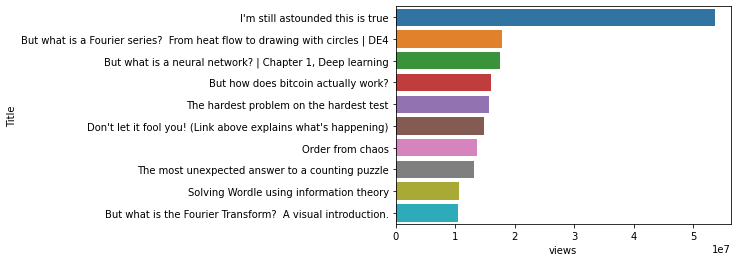

In [15]:
# comparing number of views of top 10 videos
ax1=sns.barplot(x='views',y='Title',data=top10_videos_views)

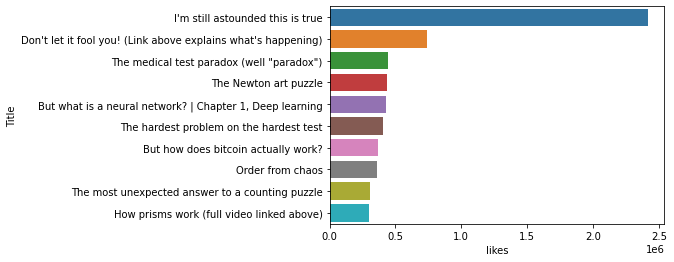

In [16]:
# comparing number of likes of top 10 videos
ax1=sns.barplot(x='likes',y='Title',data=top10_videos_likes)

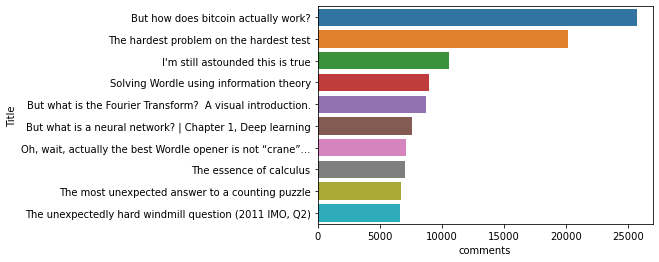

In [17]:
# comparing number of comments of top 10 videos
ax1=sns.barplot(x='comments',y='Title',data=top10_videos_comments)

In [20]:
# Interactive plots for 'Likes vs Views' and 'Comments vs Views'
# Feature to zoom in on the cluster of videos is available

video_stats = get_video_details(youtube, video_ids)
df = pd.DataFrame(video_stats)

# Converting the necessary columns to numeric types
df['views'] = pd.to_numeric(df['views'])
df['likes'] = pd.to_numeric(df['likes'])
df['comments'] = pd.to_numeric(df['comments'])

# Likes vs Views scatter plot
fig_likes = px.scatter(df, x='views', y='likes',
                       hover_name='Title',
                       hover_data={'Title': True, 'likes': True, 'views': True},
                       title='Likes vs Views',
                       labels={'views': 'Views', 'likes': 'Likes'},
                       width=900)

fig_likes.show()

# Comments vs Views scatter plot
fig_comments = px.scatter(df, x='views', y='comments',
                          hover_name='Title',
                          hover_data={'Title': True, 'likes': True, 'comments': True},
                          title='Comments vs Views',
                          labels={'views': 'Views', 'comments': 'Comments'},
                          width=900)

fig_comments.show()

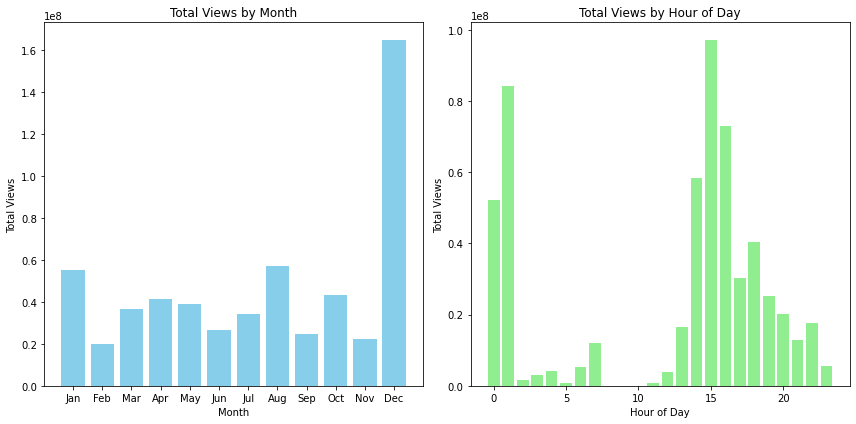

In [22]:
# Comparing the distribution of views with video publishing month and video publishing time

video_stats = get_video_details(youtube, video_ids)
df = pd.DataFrame(video_stats)


df['published_date'] = pd.to_datetime(df['published_date'])
df['month'] = df['published_date'].dt.month
df['hour'] = df['published_date'].dt.hour
df['views'] = pd.to_numeric(df['views'])

# Group by month to aggregate views
monthly_views = df.groupby('month')['views'].sum().reset_index()

# Group by hour to aggregate views
hourly_views = df.groupby('hour')['views'].sum().reset_index()

# Plot Monthly Views
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(monthly_views['month'], monthly_views['views'], color='skyblue')
plt.title('Total Views by Month')
plt.xlabel('Month')
plt.ylabel('Total Views')
plt.xticks(monthly_views['month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Plot Hourly Views
plt.subplot(1, 2, 2)
plt.bar(hourly_views['hour'], hourly_views['views'], color='lightgreen')
plt.title('Total Views by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Views')

# Show the plots
plt.tight_layout()
plt.show()

/var/folders/67/vjrfgyh95f5__cgwmlg52l880000gn/T/ipykernel_74270/516821923.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/67/vjrfgyh95f5__cgwmlg52l880000gn/T/ipykernel_74270/516821923.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/67/vjrfgyh95f5__cgwmlg52l880000gn/T/ipykernel_74270/516821923.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

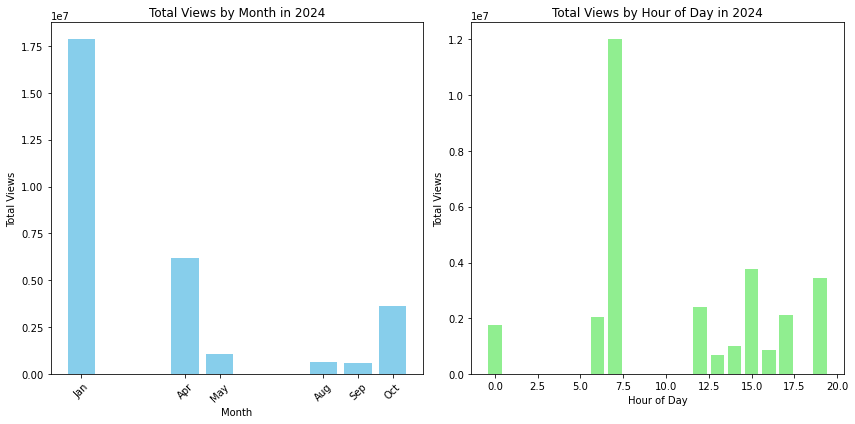

In [23]:
# same plot as above for a particular year

def plot_views_by_year(year):
    filtered_df = df[df['published_date'].dt.year == year]

    if filtered_df.empty:
        print(f"No videos found for the year {year}.")
        return

    filtered_df['month'] = filtered_df['published_date'].dt.month
    filtered_df['hour'] = filtered_df['published_date'].dt.hour

    filtered_df['views'] = pd.to_numeric(filtered_df['views'])

    # Group by month to aggregate views
    monthly_views = filtered_df.groupby('month')['views'].sum().reset_index()

    # Group by hour to aggregate views
    hourly_views = filtered_df.groupby('hour')['views'].sum().reset_index()

    # Plot Monthly Views
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.bar(monthly_views['month'], monthly_views['views'], color='skyblue')
    plt.title(f'Total Views by Month in {year}')
    plt.xlabel('Month')
    plt.ylabel('Total Views')

    # Create dynamic labels for months based on unique values in monthly_views
    month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    plt.xticks(monthly_views['month'], [month_labels[i - 1] for i in monthly_views['month']], rotation=45)

    # Plot Hourly Views
    plt.subplot(1, 2, 2)
    plt.bar(hourly_views['hour'], hourly_views['views'], color='lightgreen')
    plt.title(f'Total Views by Hour of Day in {year}')
    plt.xlabel('Hour of Day')
    plt.ylabel('Total Views')

    plt.tight_layout()
    plt.show()

# User input
year_input = int(input("Enter the year to analyze (e.g., 2023): "))
plot_views_by_year(year_input)


In [26]:
## Video duration vs engagement plots:

def convert_duration_to_seconds(duration):
    return isodate.parse_duration(duration).total_seconds()

In [27]:
video_data

,Title,published_date,views,likes,dislikes,comments,thumbnail_url,duration
0,How I animate 3Blue1Brown | A Manim demo with ...,2024-10-12,694486,39313,0,1404,https://i.ytimg.com/vi/rbu7Zu5X1zI/hqdefault.jpg,PT53M41S
1,Hologram preview,2024-10-11,23402,1626,0,33,https://i.ytimg.com/vi/W3-kpRz-e1Q/hqdefault.jpg,PT58S
2,Holograms are wild (full video linked above),2024-10-05,1809863,105389,0,717,https://i.ytimg.com/vi/DnjATyPuFFk/hqdefault.jpg,PT55S
3,How are holograms possible? | Optics puzzles 5,2024-10-05,1076552,54367,0,2483,https://i.ytimg.com/vi/EmKQsSDlaa4/hqdefault.jpg,PT46M24S
4,A cute probability fact (part 3),2024-09-10,203957,11827,0,113,https://i.ytimg.com/vi/lpzUZDefha0/hqdefault.jpg,PT1M
...,...,...,...,...,...,...,...,...
180,How to count to 1000 on two hands,2015-09-18,429194,12585,0,1166,https://i.ytimg.com/vi/1SMmc9gQmHQ/hqdefault.jpg,PT2M34S
181,What does it feel like to invent math?,2015-08-14,4200590,93672,0,5956,https://i.ytimg.com/vi/XFDM1ip5HdU/hqdefault.jpg,PT15M8S
182,Euler's Formula and Graph Duality,2015-06-21,474459,11578,0,363,https://i.ytimg.com/vi/-9OUyo8NFZg/hqdefault.jpg,PT7M27S
183,Euler's Formula Poem,2015-03-05,167064,5148,0,149,https://i.ytimg.com/vi/zLzLxVeqdQg/hqdefault.jpg,PT1M4S


In [28]:
def convert_duration_to_seconds(duration):
    total_seconds = 0

    # Remove the 'PT' prefix
    duration = duration.replace("PT", "")
    
    # Split into parts
    if 'H' in duration:
        hours, duration = duration.split('H')
        total_seconds += int(hours) * 3600  # Convert hours to seconds
    if 'M' in duration:
        minutes, duration = duration.split('M')
        total_seconds += int(minutes) * 60  # Convert minutes to seconds
    if 'S' in duration:
        seconds = duration.split('S')[0]  # Extract seconds
        if seconds:  # If there are seconds, convert them
            total_seconds += int(seconds)

    return total_seconds

In [29]:

video_data['duration_seconds'] = video_data['duration'].apply(convert_duration_to_seconds)


print(video_data[['Title', 'duration', 'duration_seconds']])

                                                 Title  duration  \
0    How I animate 3Blue1Brown | A Manim demo with ...  PT53M41S   
1                                     Hologram preview     PT58S   
2         Holograms are wild (full video linked above)     PT55S   
3       How are holograms possible? | Optics puzzles 5  PT46M24S   
4                     A cute probability fact (part 3)      PT1M   
..                                                 ...       ...   
180                  How to count to 1000 on two hands   PT2M34S   
181             What does it feel like to invent math?   PT15M8S   
182                  Euler's Formula and Graph Duality   PT7M27S   
183                               Euler's Formula Poem    PT1M4S   
184  e to the pi i, a nontraditional take (old vers...   PT6M14S   

     duration_seconds  
0                3221  
1                  58  
2                  55  
3                2784  
4                  60  
..                ...  
180            

In [30]:

# scatter plot
fig = px.scatter(video_data, 
                 x='duration_seconds', 
                 y='views', 
                 hover_name='Title',  # Show video title on hover
                 title='Video Duration vs Views',
                 labels={'duration_seconds': 'Duration (seconds)', 'views': 'Views'},
                 opacity=0.7)


fig.show()

In [35]:
# Gained Views and likes over a month

import pandas as pd
import plotly.graph_objects as go

def plot_monthly_gains_with_interactivity(df):
    
    df['published_date'] = pd.to_datetime(df['published_date'])

    last_year = df['published_date'].max() - pd.DateOffset(years=1)
    df_last_year = df[df['published_date'] >= last_year].copy()

    df_last_year['month'] = df_last_year['published_date'].dt.to_period('M')  # Get month in YYYY-MM format
    monthly_stats = df_last_year.groupby('month').agg({'views': 'sum', 'likes': 'sum'}).reset_index()

    # Plot 1: Monthly Views
    fig_views = go.Figure()

    fig_views.add_trace(go.Scatter(
        x=monthly_stats['month'].astype(str),
        y=monthly_stats['views'],
        mode='markers+lines',
        name='Monthly Views',
        marker=dict(color='blue'),
        hovertemplate='Month: %{x}<br>Views: %{y}<extra></extra>'  # Only show views
    ))

    fig_views.update_layout(
        title='Monthly Gained Views Over the Last Year',
        xaxis_title='Month',
        yaxis_title='Views',
        hovermode='closest',
    )

    fig_views.show()

    # Plot 2: Monthly Likes
    fig_likes = go.Figure()

    fig_likes.add_trace(go.Scatter(
        x=monthly_stats['month'].astype(str),
        y=monthly_stats['likes'],
        mode='markers+lines',
        name='Monthly Likes',
        marker=dict(color='green'),
        hovertemplate='Month: %{x}<br>Likes: %{y}<extra></extra>'  # Only show likes
    ))

    fig_likes.update_layout(
        title='Monthly Gained Likes Over the Last Year',
        xaxis_title='Month',
        yaxis_title='Likes',
        hovermode='closest',
    )

    fig_likes.show()


plot_monthly_gains_with_interactivity(video_data)

## Comparion between channels

In [8]:
channel_names=['Drake','EminemMusic']

In [9]:

channel_ids=search_channel_ids(youtube,channel_names)
channel_statistics=get_multiple_channel_stats(youtube,channel_ids)
channel_data=pd.DataFrame(channel_statistics)
channel_data

,channel_name,subscribers,views,total_videos,likes,comments,playlist_id
0,Drake,30300000,18626488258,64,0,0,UUByOQJjav0CUDwxCk-jVNRQ
1,EminemMusic,62600000,31610301290,196,0,0,UUfM3zsQsOnfWNUppiycmBuw


In [10]:
channel_data.dtypes

channel_name    object
subscribers     object
views           object
total_videos    object
likes            int64
comments         int64
playlist_id     object
dtype: object

In [11]:
channel_data['subscribers']=pd.to_numeric(channel_data['subscribers'])
channel_data['views']=pd.to_numeric(channel_data['views'])
channel_data['total_videos']=pd.to_numeric(channel_data['total_videos'])

In [16]:
# creating a new column for average views per video
channel_data['views_per_video'] = channel_data['views'] / channel_data['total_videos']

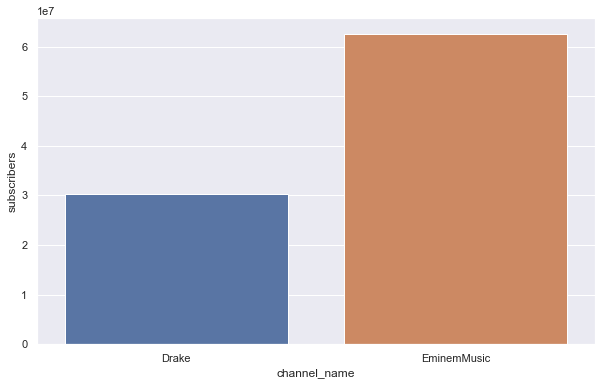

In [12]:
sns.set_theme(rc={'figure.figsize':(10,6)}) 
ax = sns.barplot(x='channel_name',y='subscribers',data=channel_data)

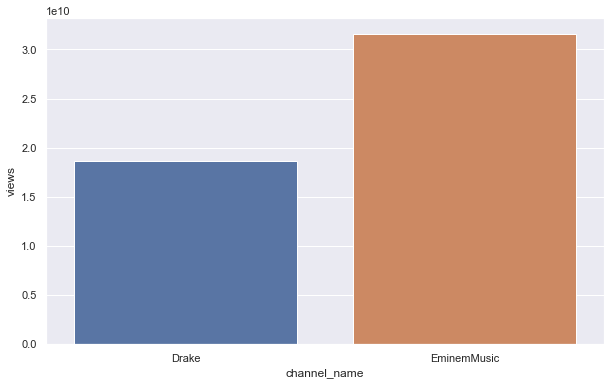

In [13]:
ax = sns.barplot(x='channel_name',y='views',data=channel_data)

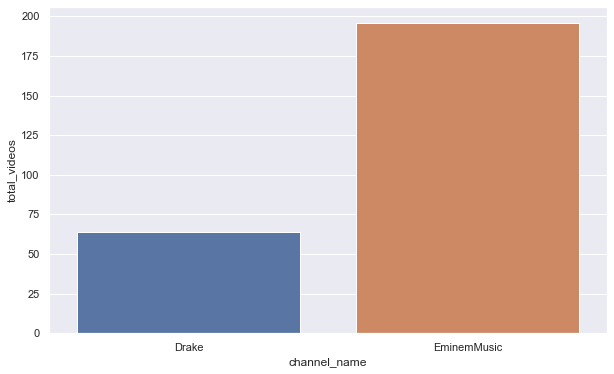

In [17]:
ax = sns.barplot(x='channel_name',y='total_videos',data=channel_data)

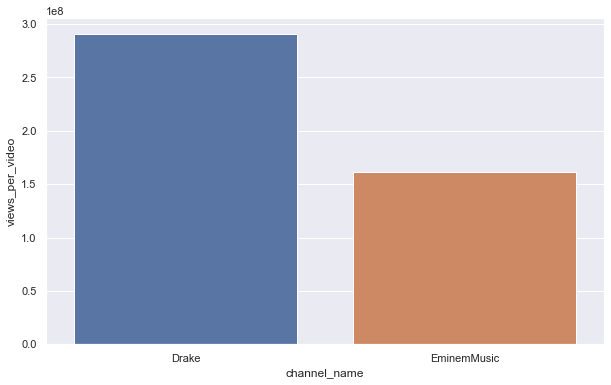

In [18]:
ax = sns.barplot(x='channel_name',y='views_per_video',data=channel_data)